In [ ]:
!pip install text-hammer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 115 kB 14.2 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving syn data not ready yet.csv to syn data not ready yet.csv


In [ ]:
df = pd.read_csv('syn data not ready yet.csv')

In [ ]:
import warnings
warnings.filterwarnings('ignore')
%config InlineBackend.figure_format = 'retina'
%config Completer.use_jedi = False

In [ ]:
df.sample(frac=1)

,text,label
19721,The court overrules the defendant's motion for...,1
35457,"130, 126 n. pg 11 ( citing mathis, 136 r. e. a...",0
31261,(c)if both the trade and business are unrestri...,1
11482,We overrule the holding in Moore v. Skiles.,1
27154,"As we saw in the video above, Bernie's two ame...",1
...,...,...
39120,"after an first call of inquiry, appellant test...",0
3246,The court's decision in the Goldman case is he...,1
16454,The court may find that a defendant is incompe...,0
18314,The court overruled the motion to quash the in...,1


In [ ]:
df = pd.read_csv('syn data not ready yet.csv')

In [ ]:
df.reset_index(drop=True, inplace=True)

In [ ]:
df = df.sample(frac=1)

In [ ]:
df.drop(['Unnamed: 0'], axis=1)

KeyError: ignored

In [ ]:
df['word_length'] = df['text'].apply(lambda x:len(x.split()))

In [ ]:
df_test = pd.read_csv('overruling.csv')

FileNotFoundError: ignored

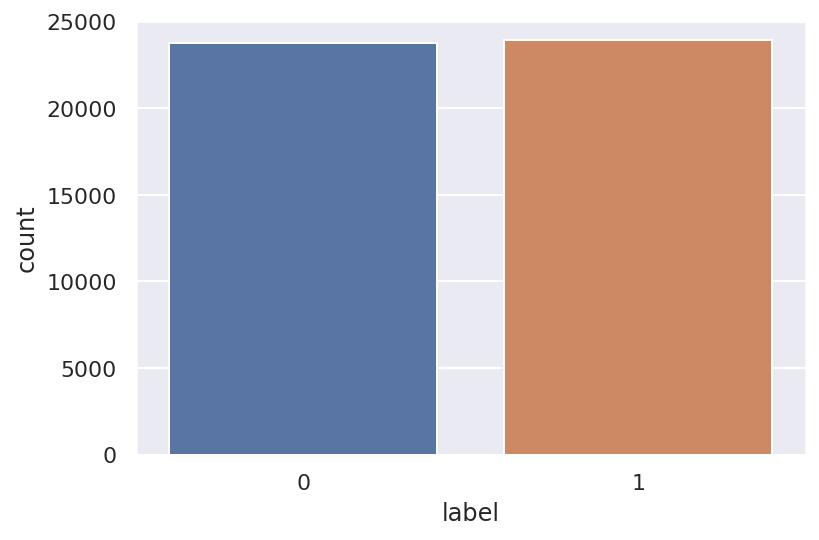

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
sns.countplot(df.label)
plt.show()

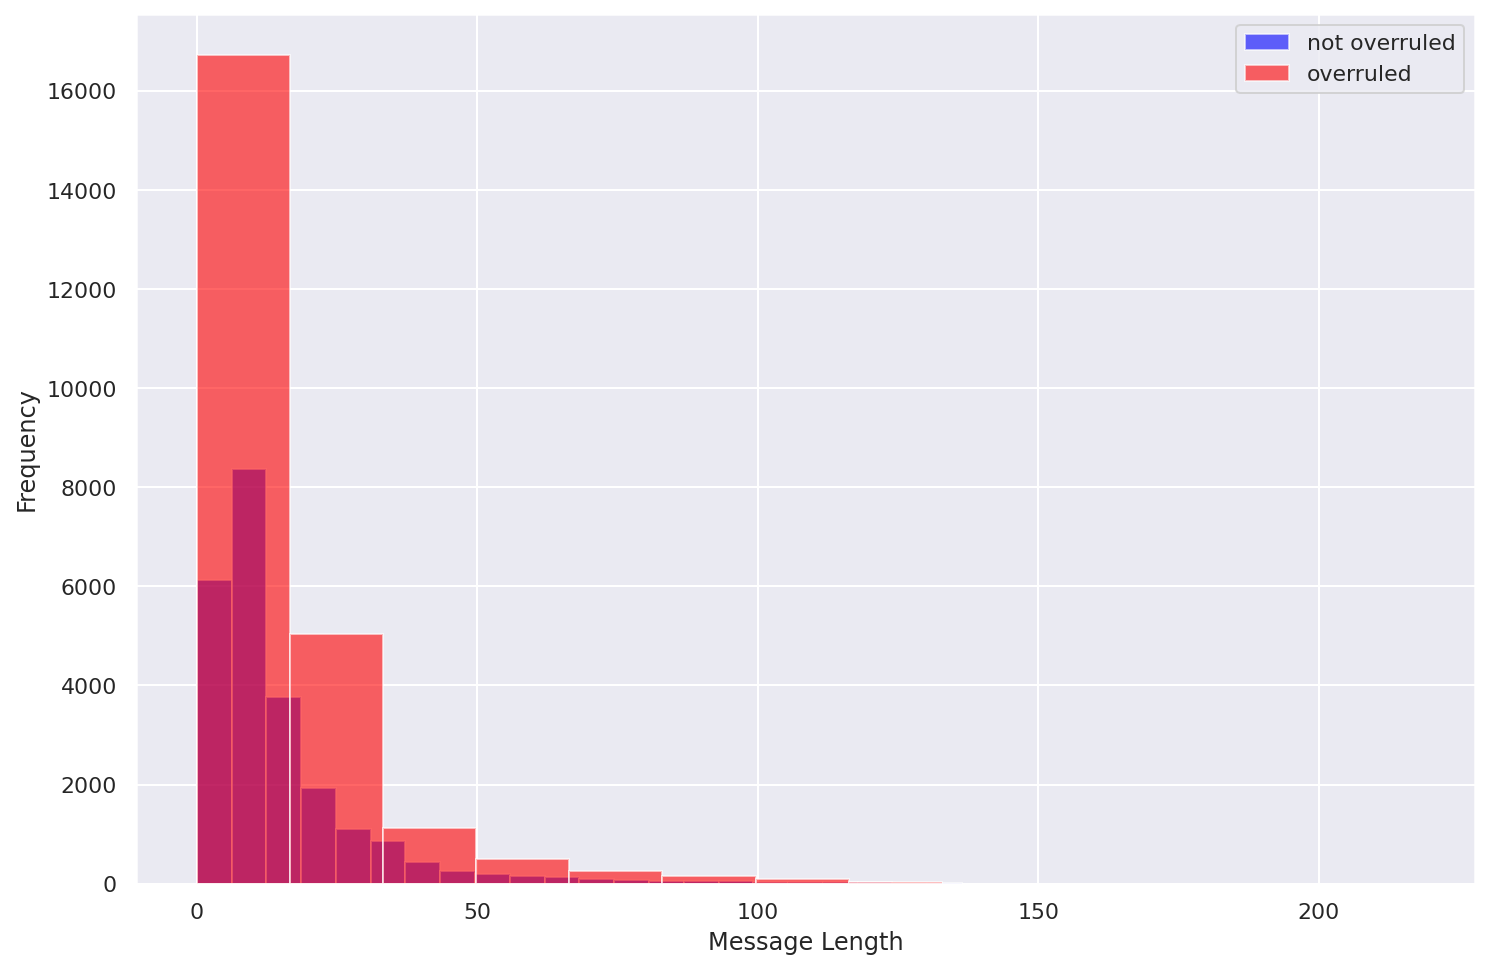

In [ ]:
plt.figure(figsize=(12, 8))

df[df.label==0].word_length.plot(bins=35, kind='hist', color='blue',
                                       label='not overruled', alpha=0.6)
df[df.label == 1].word_length.plot(kind='hist', color='red',
                                       label='overruled', alpha=0.6)
plt.legend()
plt.xlabel("Message Length")
plt.show()

In [ ]:
import text_hammer as th

In [ ]:
%%time

from tqdm._tqdm_notebook import tqdm_notebook
tqdm_notebook.pandas()

def text_preprocessing(df,col_name):
    column = col_name
    df[column] = df[column].progress_apply(lambda x:str(x).lower())
    df[column] = df[column].progress_apply(lambda x: th.cont_exp(x)) #you're -> you are; i'm -> i am
    df[column] = df[column].progress_apply(lambda x: th.remove_emails(x))
    df[column] = df[column].progress_apply(lambda x: th.remove_html_tags(x))
    df[column] = df[column].progress_apply(lambda x: th.remove_stopwords(x))
#     df[column] = df[column].progress_apply(lambda x:th.spelling_correction(x))

    df[column] = df[column].progress_apply(lambda x: th.remove_special_chars(x))
    df[column] = df[column].progress_apply(lambda x: th.remove_accented_chars(x))
    df[column] = df[column].progress_apply(lambda x: th.make_base(x)) #ran -> run,
    return(df)

CPU times: user 496 µs, sys: 0 ns, total: 496 µs
Wall time: 424 µs


In [ ]:
%%time
cleaned_df = text_preprocessing(df, "text")

  0%|          | 0/47673 [00:00<?, ?it/s]

  0%|          | 0/47673 [00:00<?, ?it/s]

  0%|          | 0/47673 [00:00<?, ?it/s]

  0%|          | 0/47673 [00:00<?, ?it/s]

  0%|          | 0/47673 [00:00<?, ?it/s]

  0%|          | 0/47673 [00:00<?, ?it/s]

  0%|          | 0/47673 [00:00<?, ?it/s]

  0%|          | 0/47673 [00:00<?, ?it/s]

CPU times: user 8min 22s, sys: 6.51 s, total: 8min 28s
Wall time: 8min 29s


In [ ]:
%%time
cleaned_test_df = text_preprocessing(df_test, "text")

NameError: ignored

In [ ]:
cleaned_df.to_csv('cleaned_data.csv')

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import nltk



### Calculating the word frequency by using nltk
words_list = []
for sentence in cleaned_df.text:
    words_list.extend(nltk.word_tokenize(sentence))
freq_dist = nltk.FreqDist(words_list)
freq_dist.most_common(50)

[('court', 22490),
 ('overrule', 12056),
 ('v', 10682),
 ('case', 7699),
 ('state', 7006),
 ('decision', 6967),
 ('defendant', 6832),
 ('hold', 6425),
 ('trial', 4566),
 ('extent', 4432),
 ('rule', 4267),
 ('appeal', 4041),
 ('law', 4038),
 ('find', 3553),
 ('evidence', 3433),
 ('opinion', 3027),
 ('right', 2917),
 ('district', 2812),
 ('s', 2797),
 ('motion', 2608),
 ('order', 2534),
 ('objection', 2513),
 ('2d', 2317),
 ('claim', 2282),
 ('disapprove', 2181),
 ('application', 2104),
 ('issue', 2090),
 ('judgment', 2060),
 ('person', 1973),
 ('plaintiff', 1925),
 ('fact', 1912),
 ('united', 1907),
 ('supra', 1906),
 ('states', 1875),
 ('require', 1850),
 ('action', 1780),
 ('act', 1764),
 ('statute', 1762),
 ('d', 1734),
 ('inconsistent', 1664),
 ('question', 1641),
 ('supreme', 1635),
 ('err', 1605),
 ('consider', 1554),
 ('new', 1522),
 ('follow', 1498),
 ('jury', 1494),
 ('apply', 1491),
 ('1', 1471),
 ('yous', 1461)]

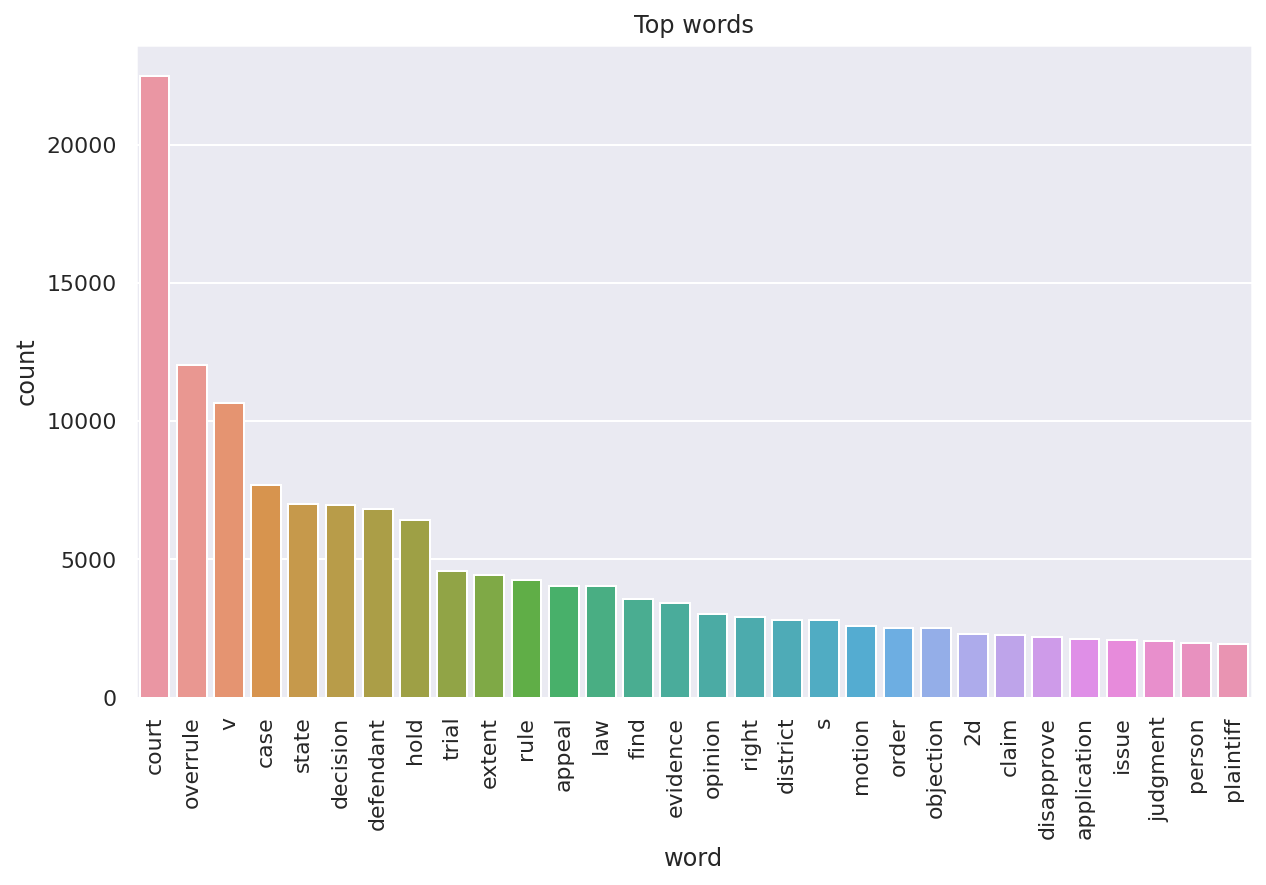

In [ ]:

temp = pd.DataFrame(freq_dist.most_common(30),  columns=['word', 'count'])
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='word', y='count',
            data=temp, ax=ax)
plt.title("Top words")
plt.xticks(rotation='vertical');

In [ ]:

from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(cleaned_df.text, cleaned_df.label, test_size = 0.2, stratify = cleaned_df.label, shuffle=True)

NameError: ignored

In [ ]:
y_test

0      0
1      0
2      0
3      0
4      1
      ..
955    1
956    1
957    1
958    1
959    1
Name: label, Length: 960, dtype: int64

In [ ]:
y_train

26398    1
26916    1
25184    1
7638     1
15927    1
        ..
27545    1
30511    1
31616    0
2216     0
32953    1
Name: label, Length: 47673, dtype: int64

In [ ]:
from keras.preprocessing.text import Tokenizer
num_words = 25000
tokenizer=Tokenizer(num_words,lower=True)
df_total = pd.concat([X_train, X_test], axis = 0)
tokenizer.fit_on_texts(df_total)

In [ ]:
len(df_total)

47673

In [ ]:
len(tokenizer.word_index)

24600

In [ ]:
cleaned_df.word_length.max()

217

In [ ]:
from keras_preprocessing.sequence import pad_sequences

X_train_ =tokenizer.texts_to_sequences(X_train)
X_train_pad=pad_sequences(X_train_,maxlen=217,padding='post')
X_test_ = tokenizer.texts_to_sequences(X_test)
X_test_pad = pad_sequences(X_test_, maxlen = 217, padding = 'post')

In [ ]:
len(X_train_)

47673

In [ ]:
print(X_train_pad.shape,X_test_pad.shape)

(38138, 217) (9535, 217)


In [ ]:
X_train_pad[0]

array([ 1136,   139,    95,    37,  3605,  8623,   329,  8624,   179,
         142,   291,    13,   102,   365,   172,    15,    32,    13,
          44,   275,    91,    13,   223,   359,   628, 14759,   150,
           4,    10,   100,     1,   155,     1,   146,   437,     1,
         193,    28,    11,     4,  1016, 14760,    13,     1,   155,
         139,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding,Bidirectional,ConvLSTM1D,MaxPooling1D,Conv1D
import tensorflow
from tensorflow.compat.v1.keras.layers import CuDNNLSTM,CuDNNGRU
from tensorflow.keras.layers import Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
# create the model
embedding_vecor_length = 500
model = Sequential()
model.add(Embedding(num_words, embedding_vecor_length, input_length=X_train_pad.shape[1]))

model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=1))

model.add(Bidirectional(CuDNNLSTM(128,return_sequences=True)))
model.add(Dropout(0.2))

model.add(Bidirectional(CuDNNLSTM(64,return_sequences=False)))
model.add(Dropout(0.2))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

print(model.summary())
filepath="weights_best_cnn.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max',save_weights_only=True)
callbacks_list = [checkpoint]
history_embedding = model.fit(X_train_pad, y_train, epochs=15, batch_size=256,verbose = 1,callbacks = callbacks_list,validation_data=(X_test_pad,y_test))

In [ ]:
# EMBEDDING_DIM = 1000
# my_model = Sequential()
# my_model.add(Embedding(input_dim = num_words,# the whole vocabulary size
#                           output_dim = EMBEDDING_DIM, # vector space dimension
#                           input_length= X_train_pad.shape[1] # max_len of text sequence
#                           ))
# my_model.add(Dropout(0.2))
# my_model.add(ConvLSTM1D(filters=64,kernel_size=3,return_sequences=True))
# my_model.add(MaxPooling1D(pool_size=2))
# my_model.add(Dropout(0.2))
# my_model.add(ConvLSTM1D(filters=64,kernel_size=3,return_sequences=True))
# my_model.add(MaxPooling1D(pool_size=2))
# my_model.add(LSTM(100))
# my_model.add(Dense(1, activation = 'sigmoid'))
# my_model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
#               optimizer=tf.keras.optimizers.Adam(1e-4),
#               metrics=['accuracy'])

In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 10)
mc = ModelCheckpoint('./modelbigru.h5', monitor = 'val_accuracy', mode = 'max', verbose = 1, save_best_only = True)

In [ ]:
tf.test.is_gpu_available(
    cuda_only=False,
    min_cuda_compute_capability=None
)

True

In [ ]:
plt.plot(history_embedding.history['accuracy'],c='b',label='train accuracy')
plt.plot(history_embedding.history['loss'],c='r',label='loss')
plt.legend(loc='lower right')
plt.show()

In [ ]:
plt.plot(history_embedding.history['accuracy'],c='b',label='train accuracy')
plt.plot(history_embedding.history['val_accuracy'],c='r',label='validation accuracy')
plt.legend(loc='lower right')
plt.show()

In [ ]:
plt.plot(history_embedding.history['val_accuracy'],c='b',label='val accuracy')
plt.plot(history_embedding.history['val_loss'],c='r',label='val loss')
plt.legend(loc='lower right')
plt.show()

In [ ]:
model.evaluate(X_test_pad, y_test)

298/298 [==============================] - 5s 15ms/step - loss: 0.3952 - accuracy: 0.8313


[0.39524146914482117, 0.8312532901763916]

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 217, 500)          12500000  
                                                                 
 conv1d_3 (Conv1D)           (None, 217, 32)           48032     
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 217, 32)          0         
 1D)                                                             
                                                                 
 bidirectional_6 (Bidirectio  (None, 217, 256)         165888    
 nal)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 217, 256)          0         
                                                                 
 bidirectional_7 (Bidirectio  (None, 128)             

In [ ]:
y_pred = np.where(model.predict(X_test_pad)>.5,1,0)

298/298 [==============================] - 4s 13ms/step


In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.89      0.79      0.84      5335
           1       0.77      0.88      0.82      4200

    accuracy                           0.83      9535
   macro avg       0.83      0.84      0.83      9535
weighted avg       0.84      0.83      0.83      9535



In [ ]:
def predict(sentence):
    sentence_lst=[]
    sentence_lst.append(sentence)
    sentence_seq=tokenizer.texts_to_sequences(sentence_lst)
    sentence_padded=pad_sequences(sentence_seq,maxlen=217,padding='post')
    probability = (model.predict(sentence_padded))[0][0]
    if probability > 0.5:
        print(f'overruled | {np.round(probability*100,2)}%')
    else:
        print(f'Not overruled | {100 - (np.round(probability*100,2))}%')

In [ ]:
predict('876 f.3d at 1306.')

Not overruled | 99.89%


In [ ]:
predict('for the reasons that follow, we approve the first district in the instant case and disapprove the decisions of the fourth district.')

overruled | 99.96%


In [ ]:
predict('the forest preserve foreclosed and then bought the property at the foreclosure auction.')

Not overruled | 99.92%


In [ ]:
predict('the second implies that the matter is not constitutionally entrusted to another branch, but that for prudential reasons we should not decide it anyway, leading to the inevitable consequence that another branch of government will decide the constitutional limits of its own power.')

overruled | 50.08%


In [ ]:

predict("however, in in re taylor, 84 b.r. 159, 160 (bankr.e.d.mo. 1988), judge barta distinguished wallace and concluded that because the debtor made required contributions pursuant to a collective bargaining agreement and had no control over the amount contributed or the manner or time of distribution, the debtor's pension plan was not self-settled.")

overruled | 50.08%


In [ ]:
predict('in keeping with this purpose, the federal circuit expressly overruled the dictum in rca that was informed by the totality of the circumstances test and which suggested that something less than a formal offer for sale could still trigger the on-sale bar.')

overruled | 50.08%


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score, precision_score, recall_score, accuracy_score
import matplotlib.pyplot as plt

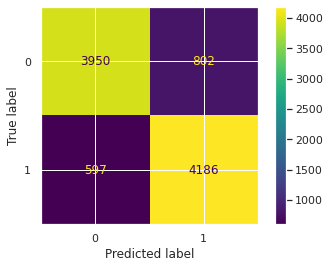

In [ ]:
mat = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(mat)
disp.plot()
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score, precision_score, recall_score, accuracy_score
import matplotlib.pyplot as plt

In [ ]:
precision_score(y_test, y_pred)

0.8392141138732959

In [ ]:
recall_score(y_test, y_pred)

0.8751829395776709

In [ ]:
f1_score(y_test, y_pred)

0.8568212056084332

In [ ]:
accuracy_score(y_test, y_pred)

0.8532773990561091